<a href="https://colab.research.google.com/github/eric-pierce/MSDS-422-HW/blob/master/epierce_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Random Forests and Gradient Boosting
## MSDS-422 Spring 2019 - Eric Pierce
## Background  
A real estate brokerage firm has procured data collected as part of a Boston Housing Study that was conducted in 1978. This data includes corrections that were made by research teams in 1996, and is available in the comma delimited file <boston.csv>.
## Objective
The real estate brokerage firm is interested in assessing market value of residential real estate, use machine learning to complement conventional methods for assessing market value. We will be evaluating four different regression modeling methods:

*  Linear Regression
*  Ridge Regression
*  Lasso Regression
*  Elastic Net

In addition to Regression, we'll be evaluating:
* Decision Trees (CART) 
* Random Forests
* Gradient Boost


## Data Dictionary


| Variable Name | Description |
| --- | --- | --- |
| neighborhood | Name of the Boston neighborhood (location of the census tract) |
| mv | Median value of homes in thousands of 1970 dollars |
| nox | Air pollution (nitrogen oxide concentration) |
| crim | Crime rate |
| zn | Percent of land zoned for lots |
| indus | Percent of business that is industrial or nonretail |
| chas | On the Charles River (1) or not (0) |
| rooms | Average number of rooms per home |
| age | Percentage of homes built before 1940 |
| dis | Weighted distance to employment centers |
| rad | Accessibility to radial highways |
| tax | Tax rate |
| ptratio | Pupil/teacher ratio in public schools |
| lstat | Percentage of population of lower socio-economic status |

# Setup and Data Import
Initialize the data and libraries used as part of this project

### Library Import and Setting Initialization

In [0]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from math import sqrt  # for root mean-squared error calculation

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

### Data Import

In [0]:
# Read in the bank data
boston_input = pd.read_csv('https://raw.githubusercontent.com/eric-pierce/MSDS-422/master/boston.csv')

# Exploratory Data Analysis
*   Clean Data
*   Identify Data Descriptions and Statistics
*   Visualize Input Data

### Clean Data

In [0]:
# examine the shape of original input data
print(boston_input.shape)

(506, 14)


In [0]:
# drop observations with missing data, if any
boston_input.dropna()
# examine the shape of input data after dropping missing data.
print(boston_input.shape)

(506, 14)


In [0]:
# look at the list of column names, note that y is the response
list(boston_input.columns.values)

['neighborhood',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rooms',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat',
 'mv']

In [0]:
# look at the beginning of the DataFrame
boston_input.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Identify Data Descriptions and Statistics

In [0]:
# Identify Summary Statistics for input dataset
boston_input.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Visualize Input Data

#### Numeric Parameter Histograms

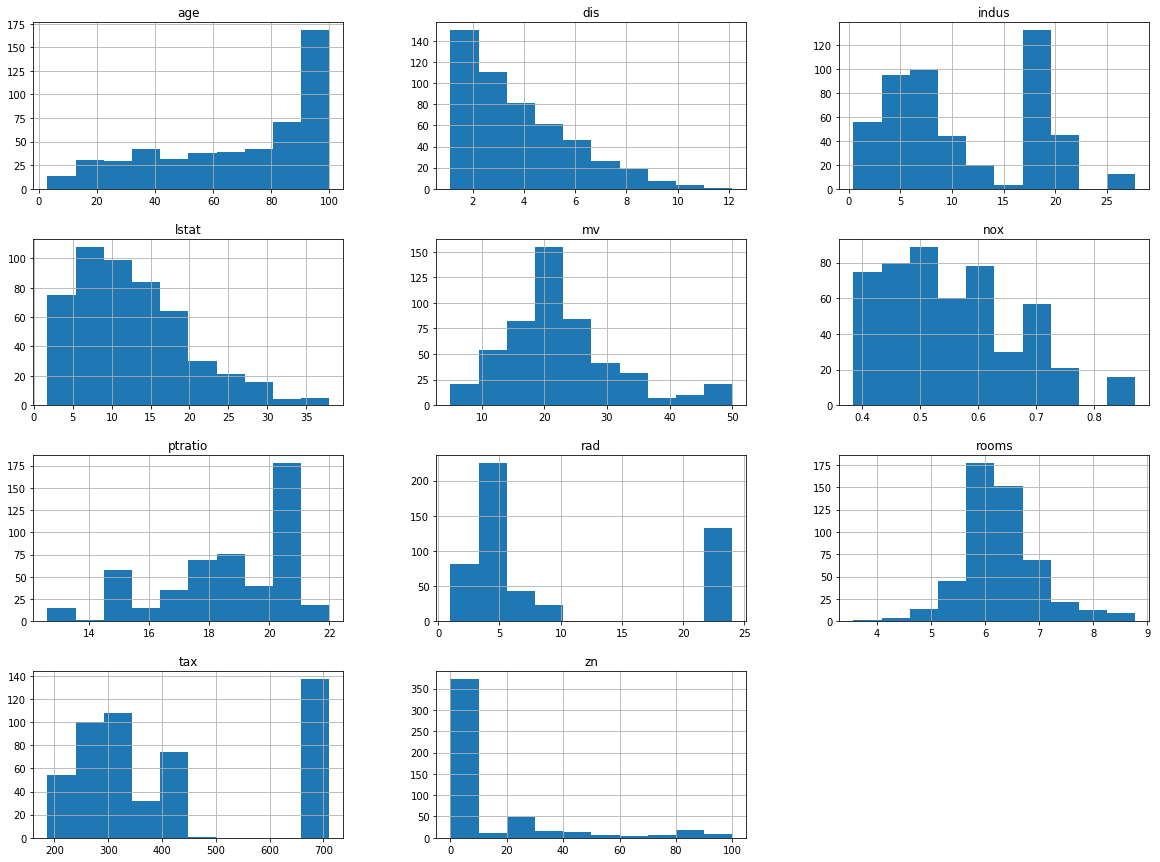

In [0]:
boston_input[['age','dis','indus','lstat','mv','nox','ptratio','rad','rooms','tax','zn']].hist(figsize=(20,15))
plt.show()

#### Compare Average Respondees

In [0]:
pd.DataFrame(boston_input.mean())

,0
crim,3.613524
zn,11.363636
indus,11.136779
chas,0.069170
nox,0.554695
rooms,6.284634
age,68.574901
dis,3.795043
rad,9.549407
tax,408.237154


#### Identify Proportions associated with Response Data

In [0]:
# Percentage of Respondees in different groups
(boston_input['neighborhood'].value_counts() / boston_input['neighborhood'].count()) * 100

Cambridge           5.928854
Savin_Hill          4.545455
Lynn                4.347826
Roxbury             3.754941
Newton              3.557312
Somerville          2.964427
South_Boston        2.569170
Quincy              2.371542
Brookline           2.371542
East_Boston         2.173913
Dorchester          2.173913
Waltham             2.173913
Medford             2.173913
Framingham          1.976285
Malden              1.778656
Peabody             1.778656
Downtown            1.581028
Belmont             1.581028
Weymouth            1.581028
Allston-Brighton    1.581028
Revere              1.581028
Braintree           1.581028
Everett             1.383399
Charlestown         1.383399
Arlington           1.383399
Forest_Hills        1.383399
Salem               1.383399
Mattapan            1.185771
Lexington           1.185771
Beverly             1.185771
                      ...   
Pembroke            0.395257
Sudbury             0.395257
Lynnfield           0.395257
Bedford       

#### Correlation Analysis

<Figure size 432x288 with 0 Axes>

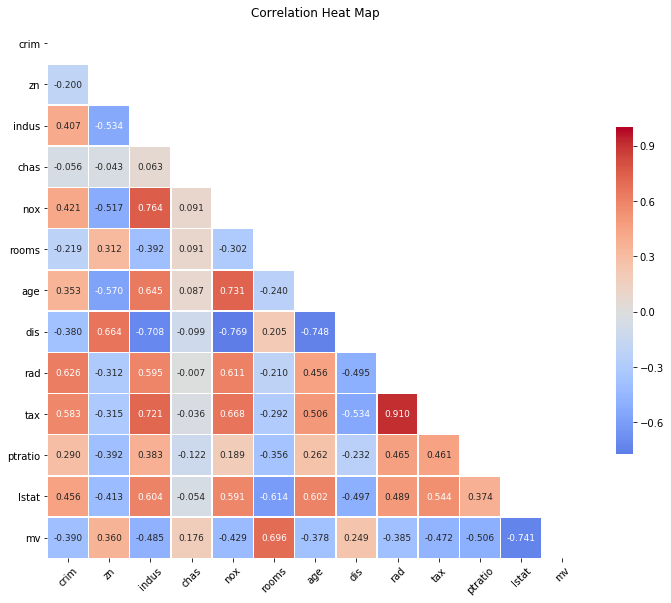

In [0]:
# Build a correlation chart to attempt to see which variables may be 
# most influential on responses
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)   

corr_chart(df_corr = boston_input)

# Regression Model Preparation

### Define Model Parameters

Based on our findings in previous explorations, we know that log transformed data produces a higher level of predictiblity.

In [0]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)

# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
# We determined in a previous exercise that log transformed data produced better
# results
prelim_model_data = np.array([np.log(boston.mv),\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# specify the set of classifiers being evaluated
names = ['Linear_Regression', 'Ridge_Regression','Lasso_Regression','ElasticNet']
regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT,
                    normalize = False), 
              Ridge(alpha = 1, solver = 'cholesky', 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    normalize = False, 
                    random_state = RANDOM_SEED),
              Lasso(alpha = 0.01,
                    fit_intercept = SET_FIT_INTERCEPT, 
                    normalize = False, 
                    random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.01,
                    fit_intercept = SET_FIT_INTERCEPT, 
                    normalize = False, 
                    random_state = RANDOM_SEED)
             ]

### Regression Training and RMSE Calculation

In [0]:
model_data = scaler.fit_transform(prelim_model_data)
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
N_FOLDS = 10

max_df = pd.DataFrame(index=names, columns=['fold_method_result','y_test','y_test_predict'])
max_df['fold_method_result']=0

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized
for train_index, test_index in kf.split(model_data):
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result

        if fold_method_result < max_df.xs(name).fold_method_result:
              max_df.at[name, 'fold_method_result'] = fold_method_result
              max_df.at[name, 'y_test'] = y_test
              max_df.at[name, 'y_test_predict'] = y_test_predict
        index_for_method += 1
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names
cv_results_df.index.name = 'Fold Number'
cv_results_df

,Linear_Regression,Ridge_Regression,Lasso_Regression,ElasticNet
Fold Number,,,,
0,0.295720,0.295111,0.296382,0.295043
1,0.355736,0.353394,0.329133,0.335566
2,0.509060,0.505277,0.458022,0.473288
3,0.424556,0.424713,0.444242,0.432758
4,0.464477,0.462934,0.446472,0.451263
5,0.340430,0.339356,0.339026,0.332325
6,0.322138,0.320841,0.329480,0.321638
7,1.080823,1.082791,1.133027,1.108997
8,0.752312,0.752114,0.743625,0.747758


In [0]:
cv_results_df.mean().to_frame(name='Average RMSE from 10 Folds')

,Average RMSE from 10 Folds
Linear_Regression,0.496452
Ridge_Regression,0.495693
Lasso_Regression,0.496555
ElasticNet,0.493129


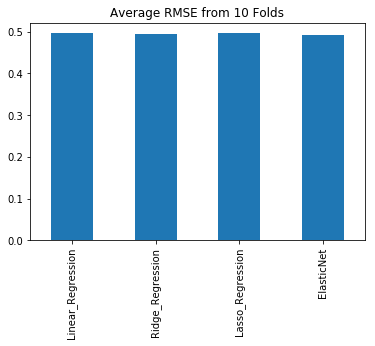

In [0]:
cv_results_df.mean().plot(kind='bar', title='Average RMSE from 10 Folds')

# Tree and Forest Model Preparation

### Define Model Parameters

In [0]:
# specify the set of classifiers being evaluated
names = ['DecisionTree','RandomForest', 'GradientBoost']
regressors = [DecisionTreeRegressor(max_features = 'log2',
                    max_depth=5,random_state = RANDOM_SEED),
              RandomForestRegressor(bootstrap = True, 
                    max_features = 'log2', n_estimators = 100, 
                    n_jobs = None, random_state = RANDOM_SEED),
              GradientBoostingRegressor(max_features = 'log2', 
                    n_estimators = 100, random_state = RANDOM_SEED)
             ]

### Evaluate Log Transformed Response

Based on our findings in the EDA phase, we can identify data which has a higher level of correlation, the therfore hopefully a higher level of predictibility.

In [0]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)

# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([np.log(boston.mv),\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# We won't be scaling our data here as Decision Trees do not need scaled data

### Decision Tree and Random Forest Training and RMSE Calculation

In [0]:
model_data = prelim_model_data
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
N_FOLDS = 10

max_df = pd.DataFrame(index=names, columns=['fold_method_result','y_test','y_test_predict'])
max_df['fold_method_result']=0

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized
for train_index, test_index in kf.split(model_data):
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result

        if fold_method_result < max_df.xs(name).fold_method_result:
              max_df.at[name, 'fold_method_result'] = fold_method_result
              max_df.at[name, 'y_test'] = y_test
              max_df.at[name, 'y_test_predict'] = y_test_predict
        index_for_method += 1
    index_for_fold += 1

cv_results_df_trees = pd.DataFrame(cv_results)
cv_results_df_trees.columns = names
cv_results_df_trees.index.name = 'Fold Number'
cv_results_df_trees

,DecisionTree,RandomForest,GradientBoost
Fold Number,,,
0,0.197190,0.177008,0.173487
1,0.176802,0.086252,0.091045
2,0.320108,0.096385,0.125499
3,0.328055,0.179499,0.179921
4,0.175411,0.141673,0.146912
5,0.419017,0.156471,0.117505
6,0.222255,0.138557,0.141763
7,0.400082,0.372169,0.372454
8,0.325420,0.268749,0.276281


In [0]:
cv_results_df_trees.mean().to_frame(name='Average RMSE from 10 Folds')

,Average RMSE from 10 Folds
DecisionTree,0.280850
RandomForest,0.181531
GradientBoost,0.182835


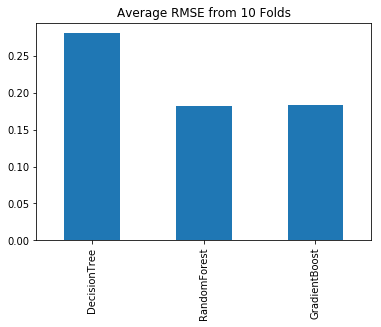

In [0]:
cv_results_df_trees.mean().plot(kind='bar', title='Average RMSE from 10 Folds')

### Decision Tree Visualization

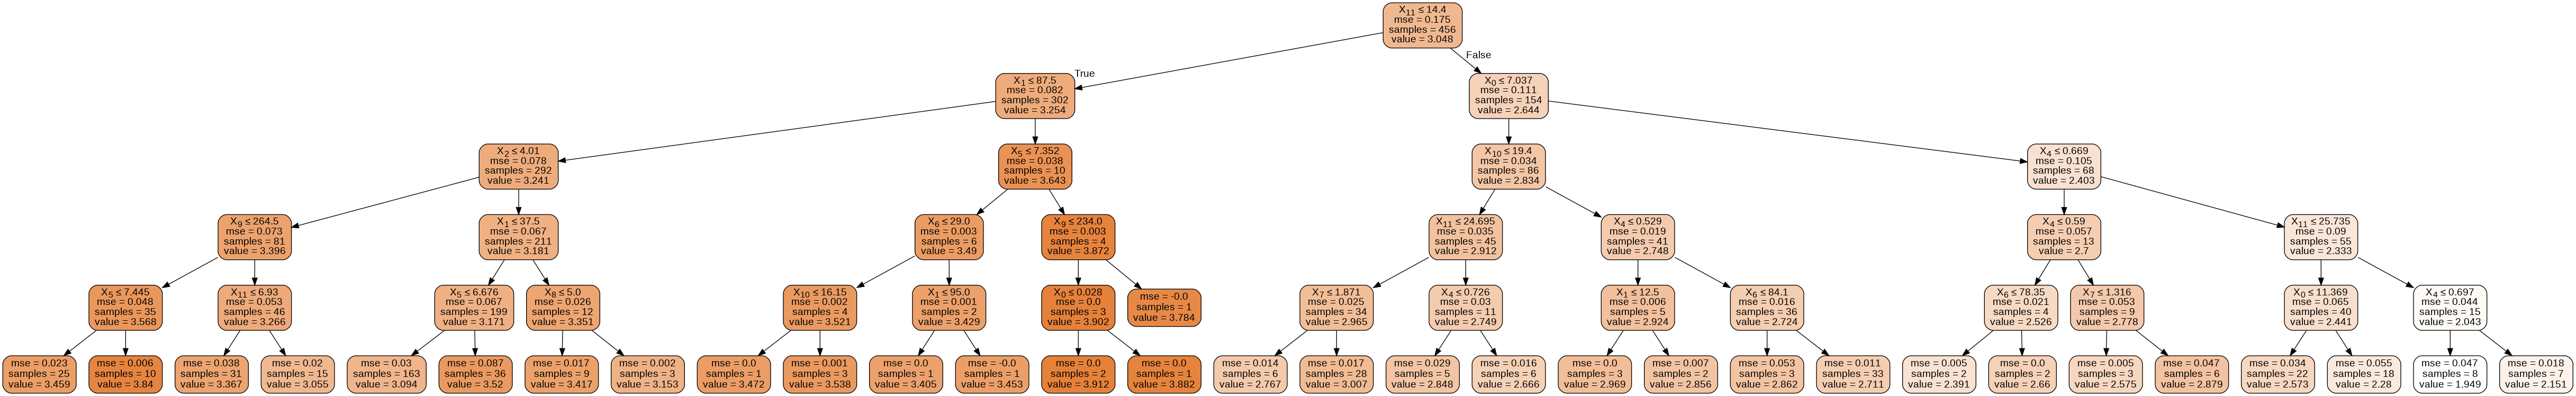

In [0]:
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressors[0], out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### Explanatory Variable Analysis

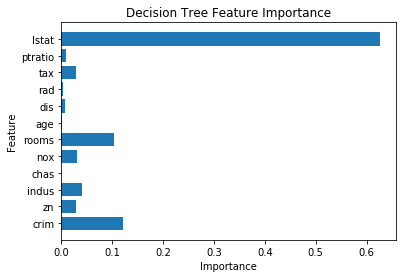

In [0]:
#regressors[1].feature_importances_
plt.barh(np.arange(model_data.shape[1]-1), regressors[0].feature_importances_) 
plt.yticks(np.arange(model_data.shape[1]-1), boston.columns)
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

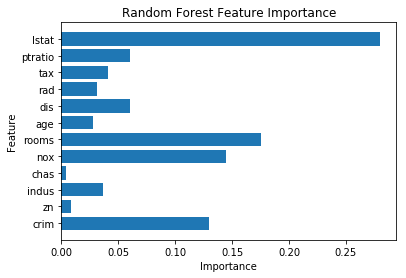

In [0]:
plt.barh(np.arange(model_data.shape[1]-1), regressors[1].feature_importances_) 
plt.yticks(np.arange(model_data.shape[1]-1), boston.columns)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

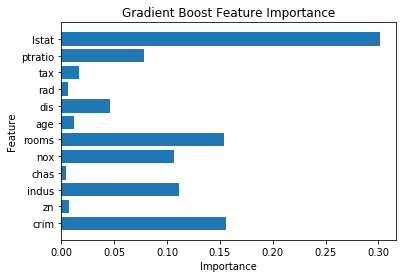

In [0]:
plt.barh(np.arange(model_data.shape[1]-1), regressors[2].feature_importances_) 
plt.yticks(np.arange(model_data.shape[1]-1), boston.columns)
plt.title("Gradient Boost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Combined Results - Decision Trees and Random Forests

In [0]:
#cv_results_df_trees.mean().plot(kind='bar', title='Average RMSE from 10 Folds')
combined = cv_results_df_trees.mean().append(cv_results_df.mean()).to_frame(name='Average RMSE from 10 Folds')
combined

,Average RMSE from 10 Folds
DecisionTree,0.280850
RandomForest,0.181531
GradientBoost,0.182835
Linear_Regression,0.496452
Ridge_Regression,0.495693
Lasso_Regression,0.496555
ElasticNet,0.493129


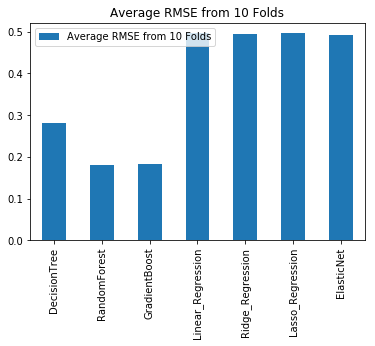

In [0]:
combined.plot(kind='bar', title='Average RMSE from 10 Folds')

# Recommendations

With the parameters tested, the Random Forest method performed better than any other modeling technique, while GradientBoost was a very close second. The most important features as identified by all three Tree models were Crime rate, Percentage of population of lower socio-economic status, and Average number of rooms per home. 

These results indicate that the firm should move forward with Random Forests as the model of choice, and that there are a subset of features (listed above) which are the most important in terms of identifying home valuation.